## Imports

In [19]:
import numpy as np
import linecache as lc
import matplotlib.pyplot as plt

# Aggregating postcodes by alphabetical prefix

In [3]:
candidate_id_og = lc.getline(r"CaseStudyData.txt", 27).split(" ")[2:-1]
candidate_id_og = [id.strip('"') for id in candidate_id_og]

## Aggregating  warehouse costs and capacities

In [4]:
def process_costs_capacities(line_start, line_stop):
    
    '''
    Simply takes the line to start reading, and the line to stop reading. Then, it 
    processes and transforms the 1D cost and capacity vectors into a format that we can use.
    '''
    
    file = open(r"CaseStudyData.txt", "r")
    costs_og = file.readlines()[line_start-1:line_stop]
    costs_og = list(map(lambda s: s.strip(), costs_og))

    costs_og = [costs_og[line].split(" ") for line in range(len(costs_og))]
    costs = []
    for line in costs_og:
        for i in range(len(line)):
            costs.append(line[i].strip('[]'))
            
    costs = costs[2:]        
    costs = [eval(cost) for cost in costs]
    return costs

In [18]:

#This pulls the differet costs, and the capacities for each candidate id
setup_costs = process_costs_capacities(62, 105)
operating_costs = process_costs_capacities(108, 146)
wh_capacities = process_costs_capacities(149, 193)


#this creates a list of lists
Cost_Comparisons = np.array([[candidate_id_og[i], int(setup_costs[i]), int(operating_costs[i]), int(wh_capacities[i])] for i in range(len(candidate_id_og))], dtype=object)

TotalCosts = [Cost_Comparisons[i, 1] + 10*Cost_Comparisons[i, 2] for i in range(len(Cost_Comparisons))]
TotalCost_per_Capacity = [(Cost_Comparisons[i, 1] + 10*Cost_Comparisons[i, 2]) / Cost_Comparisons[i, 3] for i in range(len(Cost_Comparisons))]

Cost_Comparisons = np.c_[Cost_Comparisons, TotalCosts, TotalCost_per_Capacity]



# print(Cost_Comparisons[:, 0])

42 20
1356000 1250000


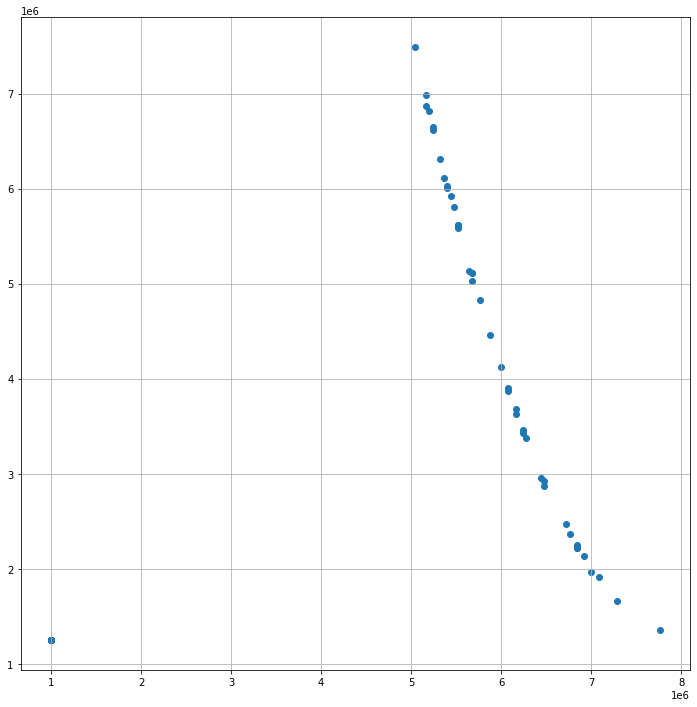

In [40]:
#the list of postcode districts
pc_areas = ["AB", "DD", "DG", "EH", "FK", "G", "HS", "IV", "KA", "KW", "KY", "ML", "PA", "PH", "TD"]


def areas_to_consider(pc):
    areas_to_consider = []
    for i in range(len(candidate_id_og)):
        if pc in Cost_Comparisons[i, 0]:
            areas_to_consider.append(Cost_Comparisons[i, :])
    return np.array(areas_to_consider)




eh_data = areas_to_consider("IV")
print(np.argmax(eh_data[:,3]), np.argmin(eh_data[:,3]))
print(eh_data[np.argmax(eh_data[:,3]), 4], eh_data[np.argmin(eh_data[:,3]),4])


plt.figure(figsize = (12,12))
plt.scatter(eh_data[:,3], eh_data[:,4])
plt.grid()

In [72]:
print("The cheapest option in each aggregated areas are:")
for area in pc_areas:
    subset = areas_to_consider(area)
    cheapest_i = np.argmin(subset[:, 4])
    print(f"{area}: The cheapest is {subset[cheapest_i, 0]} with a cost of {subset[cheapest_i, 4]}")

print("\n")
print("The most value in each aggregated area is:")
for area in pc_areas:
    subset = areas_to_consider(area)
    cheapest_i = np.argmin(subset[:, 5])
    print(f"{area}: The cheapest is {subset[cheapest_i, 0]} with a cost per capacity of {round(subset[cheapest_i, 5], 2)}")

The cheapest option in each aggregated areas are:
AB: The cheapest is AB35 with a cost of 1250000
DD: The cheapest is DD10 with a cost of 1664000
DG: The cheapest is DG6 with a cost of 1250000
EH: The cheapest is EH42 with a cost of 3792000
FK: The cheapest is FK20 with a cost of 1608000
G: The cheapest is DG6 with a cost of 1250000
HS: The cheapest is HS1 with a cost of 1250000
IV: The cheapest is IV21 with a cost of 1250000
KA: The cheapest is KA26 with a cost of 1250000
KW: The cheapest is KW11 with a cost of 1250000
KY: The cheapest is KY10 with a cost of 2896000
ML: The cheapest is ML12 with a cost of 1860000
PA: The cheapest is PA20 with a cost of 1250000
PH: The cheapest is PH17 with a cost of 1250000
TD: The cheapest is TD15 with a cost of 1832000


The most value in each aggregated area is:
AB: The cheapest is AB36 with a cost per capacity of 0.16
DD: The cheapest is DD10 with a cost per capacity of 0.23
DG: The cheapest is DG10 with a cost per capacity of 0.16
EH: The cheapes